In [1]:
!pip install konlpy
!pip install koreanize-matplotlib
!pip install wordcloud

import numpy as np
import pandas as pd
import re

import konlpy

import plotly.express as px
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 56.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 데이터 불러오기 및 확인
df = pd.read_csv('/content/drive/MyDrive/KDT /17년도 철도사고.csv')
df

,지역번호,소속,선명,역이름,년,월,일,시,분,요일,역/열차,장소,세부장소,성별,나이,음주,세부내용,부상상태
0,서울본부,서울고속열차승무사업소,경부선,서울역,17,1,1,12,59,일,KTX,객실출입문,5호차,여,37,무,5호차 객실출입문에 끼어 손가락이 골절,경상
1,서울본부,용산고속열차승무사업소,호남선,용산역,17,1,2,16,30,월,무궁화,화장실,화장실 문,여,6,무,화장실문에 오른쪽 중지 손가락이 끼어 찰과상,경상
2,서울본부,대곡관리역,일산선,마두역,17,1,5,15,8,목,역,E/S,2번출구 2번하행,여,82,무,뒤에 있던 이공신(77세) 고객이 앞으로 넘어지면서 부딪히는 충격으로 타박상,경상
3,서울본부,서울고속열차승무사업소,경부선,동대구역,17,1,5,14,30,목,KTX,이동통로,15호차 화장실 앞,남,55,무,화장실 이용 후 객실로 이동 중 넘어져 왼쪽 무릎 아래 중간이 골절됨,경상
4,서울본부,서울관리역,경부선,포항역,17,1,2,16,0,월,역,화장실,화장실 내,남,60,무,"서울역 화장실에서 넘어져 이마 상처 생김, 467열차팀장 -> 포항역에 인계되어 접...",경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2978,수도권동부,망우관리역,경원선,회기역,2017,12,28,16,20,목,역,계단,경원선 남쪽,남,71,무,경원선 남쪽 계단을 이용하여 승강장으로 내려가던 중 하부에서 넘어져 구르면서 머리 ...,경상
2979,수도권동부,의정부관리역,경원선,회룡역,2017,12,28,17,43,목,역,E/S,1호기,여,57,무,"ES 1호기 올라가다 넘어짐, 좌우 종아리 엉치 외상 발생",경상
2980,수도권동부,수서관리역,분당선,야탑역,2017,12,28,20,3,목,역,E/S,4번출구 하행,남,77,무,"4번 출구 하행 에스컬레이터 4호기를 이용하여 역사로 들어오던 고객(김창호, 남, ...",경상
2981,수도권동부,춘천관리역,경춘선,남춘천역,2017,12,29,15,5,금,역,E/S,외부ES,여,78,무,"외부 ES에서 올라 오던중 오순례(78세),김상옥(89세)이 넘어져 오순례씨가 오른...",경상


In [5]:
df.dtypes

지역번호    object
소속      object
선명      object
역이름     object
년        int64
월        int64
일        int64
시       object
분       object
요일      object
역/열차    object
장소      object
세부장소    object
성별      object
나이      object
음주      object
세부내용    object
부상상태    object
dtype: object

In [6]:
df_age = df.loc[:, ['나이']]
df_age

,나이
0,37
1,6
2,82
3,55
4,60
...,...
2978,71
2979,57
2980,77
2981,78


In [8]:
df_age['나이'].unique() # unique() => 중복을 제외한 값을 array로 리턴 해줌


array(['37', '6', '82', '55', '60', '8', '67', '5', '미상', '35', '29',
       '56', '3', '24', '69', '27', '26', '59', '65', '93', '81', '57',
       '70', '85', '11', '71', '80', '58', '53', '22', '7', '20', '63',
       '50', '83', '54', '43', '46', '45', '62', '38', '73', '19', '36',
       '76', '75', '79', '44', '41', '74', '68', '47', '23', '40', '28',
       '30', '42', '39', '49', '33', '86', '64', '32', '21', '15', '66',
       '87', '4', '52', '34', '25', '72', '1', '48', '51', '90', '77',
       '13', '2', '31', '78', '88', '10', '61', '84', '12', '89', '94',
       '17', '91', '18', '92', '95', '16', '9', '14', '99', '97', '96'],
      dtype=object)

In [9]:
df['나이'].value_counts()

65    137
미상    132
75    117
55     98
70     97
     ... 
8       2
12      2
92      1
97      1
96      1
Name: 나이, Length: 99, dtype: int64

In [13]:
df_age

,나이
0,37
1,6
2,82
3,55
4,60
...,...
2978,71
2979,57
2980,77
2981,78


In [15]:

df_es = df[df['장소'] == 'E/S' ]
df_es

,지역번호,소속,선명,역이름,년,월,일,시,분,요일,역/열차,장소,세부장소,성별,나이,음주,세부내용,부상상태
2,서울본부,대곡관리역,일산선,마두역,17,1,5,15,8,목,역,E/S,2번출구 2번하행,여,82,무,뒤에 있던 이공신(77세) 고객이 앞으로 넘어지면서 부딪히는 충격으로 타박상,경상
6,서울본부,대곡관리역,일산선,대화역,17,1,6,23,29,금,역,E/S,5번출구,여,67,음주,에스컬레이터를 타고 올라가던 중 넘어져 구르며 머리 뒷부분 상처,경상
19,서울본부,대곡관리역,일산선,대화역,17,1,19,17,25,금,역,E/S,상행 승강장,여,24,무,"앞 고객(서동인, 78, 음주상태)이 중심을 잃고 넘어지며 뒤에서 연달아 넘어지면서...",경상
20,서울본부,용산관리역,경부선,용산역,17,1,22,10,0,일,역,E/S,8번 승강장 북쪽 13호기 하행,남,59,무,에스컬레이터 하행 이용 후 바닥판에 미끄러지며 넘어지는 사고로 에스컬레이터 기둥에 ...,경상
22,서울본부,대곡관리역,일산선,대곡역,17,1,20,14,35,금,역,E/S,대화행 하행 E/S,남,93,무,걸어서 내려오다가 넘어지며 머리 후부 열상,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,수도권동부,양평관리역,경의중앙선,양평역,2017,12,25,11,40,월,역,E/S,전철 하행,여,73,무,하행전동열차로 도착하여 승강장에서 E/S를 이용하여 올라오던 중 앞선 고객분이 넘어...,경상
2975,수도권동부,경기광주관리역,경강선,이천역,2017,12,26,10,1,화,역,E/S,3호기(상행),여,76,무,E/S 3호기(상행) 진입 중 진입로 표시를 오인하고 하행 E/S 으로 탑승하여 넘어짐,경상
2979,수도권동부,의정부관리역,경원선,회룡역,2017,12,28,17,43,목,역,E/S,1호기,여,57,무,"ES 1호기 올라가다 넘어짐, 좌우 종아리 엉치 외상 발생",경상
2980,수도권동부,수서관리역,분당선,야탑역,2017,12,28,20,3,목,역,E/S,4번출구 하행,남,77,무,"4번 출구 하행 에스컬레이터 4호기를 이용하여 역사로 들어오던 고객(김창호, 남, ...",경상


In [16]:
df_es_age = df_es.loc[:, ['나이']]
df_es_age

,나이
2,82
6,67
19,24
20,59
22,93
...,...
2971,73
2975,76
2979,57
2980,77


In [17]:
df_es_age['나이'].unique() # unique() => 중복을 제외한 값을 array로 리턴 해줌


array(['82', '67', '24', '59', '93', '35', '미상', '81', '57', '70', '71',
       '80', '58', '53', '75', '79', '63', '74', '68', '15', '20', '65',
       '83', '23', '64', '72', '32', '76', '90', '13', '85', '39', '77',
       '78', '51', '52', '26', '66', '30', '55', '62', '88', '73', '38',
       '48', '86', '46', '47', '50', '84', '87', '54', '29', '7', '92',
       '40', '22', '61', '25', '17', '45', '95', '60', '69', '42', '16',
       '94', '27', '6', '33', '91', '56', '36', '37', '43', '31', '28',
       '34', '2', '4', '41', '5', '21', '14', '19', '18', '44', '97',
       '10', '96', '49', '3', '89', '9'], dtype=object)

In [18]:
df_es_age = df_es_age[df_es_age['나이'] != '미상']
df_es_age

,나이
2,82
6,67
19,24
20,59
22,93
...,...
2971,73
2975,76
2979,57
2980,77


In [19]:
df_es_age['나이'].unique()

array(['82', '67', '24', '59', '93', '35', '81', '57', '70', '71', '80',
       '58', '53', '75', '79', '63', '74', '68', '15', '20', '65', '83',
       '23', '64', '72', '32', '76', '90', '13', '85', '39', '77', '78',
       '51', '52', '26', '66', '30', '55', '62', '88', '73', '38', '48',
       '86', '46', '47', '50', '84', '87', '54', '29', '7', '92', '40',
       '22', '61', '25', '17', '45', '95', '60', '69', '42', '16', '94',
       '27', '6', '33', '91', '56', '36', '37', '43', '31', '28', '34',
       '2', '4', '41', '5', '21', '14', '19', '18', '44', '97', '10',
       '96', '49', '3', '89', '9'], dtype=object)

In [21]:
df_es_age['나이'] = df_es_age['나이'].astype(int)
df_es_age

,나이
2,82
6,67
19,24
20,59
22,93
...,...
2971,73
2975,76
2979,57
2980,77


In [22]:
df_es_age['나이'].unique()

array([82, 67, 24, 59, 93, 35, 81, 57, 70, 71, 80, 58, 53, 75, 79, 63, 74,
       68, 15, 20, 65, 83, 23, 64, 72, 32, 76, 90, 13, 85, 39, 77, 78, 51,
       52, 26, 66, 30, 55, 62, 88, 73, 38, 48, 86, 46, 47, 50, 84, 87, 54,
       29,  7, 92, 40, 22, 61, 25, 17, 45, 95, 60, 69, 42, 16, 94, 27,  6,
       33, 91, 56, 36, 37, 43, 31, 28, 34,  2,  4, 41,  5, 21, 14, 19, 18,
       44, 97, 10, 96, 49,  3, 89,  9])

In [23]:
df_es_age = df_es_age.groupby(by = ['나이']).size().reset_index(name = '총수') 
df_es_age

,나이,총수
0,2,1
1,3,1
2,4,1
3,5,3
4,6,2
...,...,...
88,93,3
89,94,1
90,95,2
91,96,1


In [24]:
px.histogram(df_es_age, x = '나이', y = '총수')

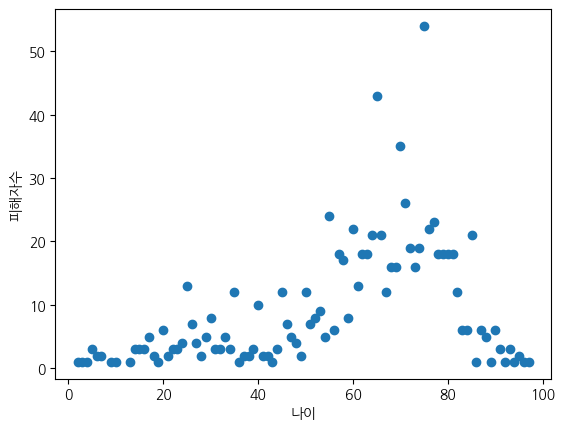

In [28]:
plt.scatter(x = df_es_age['나이'], y = df_es_age['총수'])
plt.xlabel('나이') # X 축 이름
plt.ylabel('피해자수') # Y 축 이름
plt.show()

In [ ]:
df_es = df_es.loc[:, ['장소']]
